# NB and Logistic Regression Project 

Welcome to NB and Logistic Regression Project!

**Build a classification model which will recognise the activities through the mobile sensor like walking, walking_upstairs  ,walking_downstairs ,sitting  ,standing,laying.The topic Human Activity recognition is in research and has its own advantages like anomaly detection, for healthy diet maintenance fitness bands are used , measuring stress level ,for monitoring employees ,for heartbeat pulse rate etc. In this project we are going to focus on  the dataset which was carried out through experiments with a group of 30 volunteers wearing a smartphone.The experiments have been video-recorded to label the data manually. The main motto is to use the dataset and work with the libraries like scikit learn and machine learning related libraries and algorithms while training.**

# Importing Libraries

In [196]:
import pandas as pd
from sklearn.ensemble import *
from sklearn.tree import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import *
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.naive_bayes import *
from sklearn.svm import *
from sklearn.neighbors import *
from sklearn.tree import *
from sklearn.metrics import *
from sklearn.decomposition import PCA
from pandas_profiling import ProfileReport
import time
%matplotlib inline

In [197]:
data = pd.read_csv('../input/ml-assignment-dataset/SATWIK ARINDAM HOTA - human_activity.csv')

# EDA and Basic Data Preprocessing and Preparation

In [198]:
data.shape

(7352, 563)

*First verifying the number of columns and rows in the dataset.*

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


*Getting the info about the kind of data and columns in the dataset.*

In [200]:
#Having a look at the data before proceeding 
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [201]:
#Getting the basic description about dataset to check for the need to normalize or possible outlier information
data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


** The data seems to be normalized as the max and min values usually for the features are found to be 1 and -1 and the values between the same.*

*We check the Activity column in the dataset if any one activity is highly observed during the observation as this can cause bias in the data*

In [202]:
data['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [203]:
data['Activity'].value_counts(normalize = True)


LAYING                0.191376
STANDING              0.186888
SITTING               0.174918
WALKING               0.166757
WALKING_UPSTAIRS      0.145947
WALKING_DOWNSTAIRS    0.134113
Name: Activity, dtype: float64

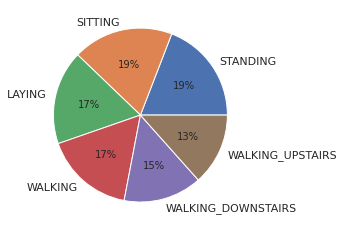

In [204]:
value_count_activity = data['Activity'].value_counts(normalize = True)[:]
plt.pie(value_count_activity[:],labels = data['Activity'].unique(), autopct ='%.0f%%')
plt.show()

*The activity seems to be quite evenly distributed with static activity taking more portions compared to dynamic activity as is often the case*

In [205]:
data['Activity']

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
7347    WALKING_UPSTAIRS
7348    WALKING_UPSTAIRS
7349    WALKING_UPSTAIRS
7350    WALKING_UPSTAIRS
7351    WALKING_UPSTAIRS
Name: Activity, Length: 7352, dtype: object

*Since the dataset has mostly two sensors mentioned in the columns we check if the dataset has data observed particularly largely from any one sensor, as accelerometer would generally help us measure dynamic activity like movement while gyroscope would help in measuring orientation of the body*

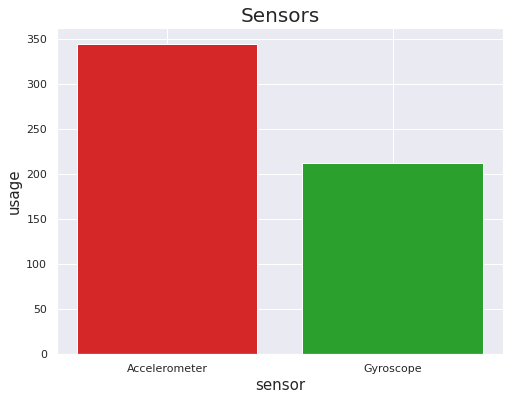

In [206]:
#Counting the importance of sensors from the column names
Acc_count = 0
Gyro_count = 0
for i in data.columns:
    if 'Acc' in i:
        Acc_count += 1
    elif 'Gyro' in i:
        Gyro_count += 1
plt.figure(figsize = (8,6))
plt.bar(x = ['Accelerometer','Gyroscope'],height = [Acc_count, Gyro_count],color = ['tab:red','tab:green'])
plt.title('Sensors',fontsize = 20)
plt.xlabel('sensor', size = 15)
plt.ylabel('usage', size =15)
plt.show()

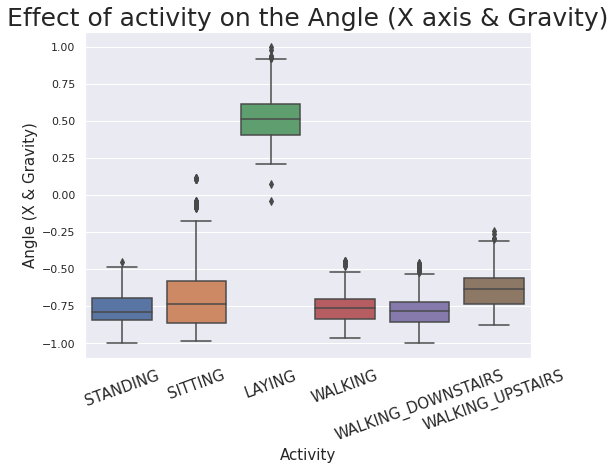

In [207]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=data)
plt.title('Effect of activity on the Angle (X axis & Gravity)', fontsize=25)
plt.xlabel("Activity", size=15)
plt.ylabel('Angle (X & Gravity)', size=15)
plt.xticks(rotation = 20, fontsize = 15)
plt.show()

*One can make the observation that if Angle (X & Gravity) is greater than 0 then Activity is Laying*

**We will use label encoder from sklearn.preprocessing to to encode the activity object to be stored as numerical values before we move on to any data processing as these have been stored as objects and numeric values would be easy to classify**

In [208]:
le = LabelEncoder()
data['Activity'] = le.fit_transform(data['Activity'])

In [209]:
le.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [210]:
le.transform(['LAYING',  'STANDING', 'WALKING'])

array([0, 2, 3])

In [211]:
le.inverse_transform([0,1,2,3,4,5])
#to see which features linked to which numbers

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

## Null/Outlier Treatment

In [212]:
data.dropna()
print(data.shape)

(7352, 563)


*First we check for any missing values in the given dataset. As the dimensions of the dataset remained the same before and after using dropna function on the dataset, we can say the data does not have any missing or null values.*

In [213]:
print(data.isna().sum().sum())

0


**No null values were detected in the dataset**

In [214]:
#checking for duplicates 
data.duplicated().sum()

0

**No duplicate values were detected in the dataset**

*We then check for outlier using the Z_score method(classify as outlier if Z_score > 3) and check if we need to eliminate the outliers if the outliers percentage if too much.*

In [215]:
#outlier treatment
outliers_percentage = []
data_select = data.sample(n= 10, axis = 'columns')
for i in data_select:
    count = 0
    for j in data_select[i]:
        column_mean = np.mean(data_select[i])
        column_std = np.std(data_select[i])
        threshold = 3
        z_value = abs(j-column_mean)/column_std
        if(z_value>threshold):
            count+=1
    outliers_percentage.append(count/len(data_select[i]))        

*Since the data has many columns, looping through each and every 563 columns and checking for outliers in 7352 entries would not be optimal. Hence we would consider any random 10 columns and calculate the outlier percentage among them and make suitable conclusion about the dataset from the observations.*

In [216]:
print(outliers_percentage)

[0.01945048966267682, 0.02176278563656148, 0.005032644178454842, 0.0053046789989118605, 0.0073449401523395, 0.017138193688792165, 0.016866158868335146, 0.017274211099020675, 0.010201305767138194, 0.017002176278563656]


*As clearly visible from the obtained random test for outliers using Z_score the number of outliers were found to be low. This random sampling was run over ten times and the value of outliers came lower than 3% everytime. Hence we can assume that the data does not have outliers and doesn't require specific outlier treatment.*

In [217]:
correlation = data.corr()
correlation

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
tBodyAcc-mean()-X,1.000000,0.148061,-0.256952,0.000619,-0.021903,-0.044617,0.006290,-0.022754,-0.047558,0.044062,...,-0.015613,-0.544320,0.012173,0.037444,0.028844,-0.035257,0.034371,0.028242,0.024181,0.005689
tBodyAcc-mean()-Y,0.148061,1.000000,-0.078769,-0.045160,-0.044920,-0.049746,-0.044180,-0.045049,-0.050402,-0.038108,...,-0.004459,0.070559,-0.013541,0.017967,0.075679,-0.005309,0.001053,-0.013903,-0.003144,-0.062310
tBodyAcc-mean()-Z,-0.256952,-0.078769,1.000000,-0.020217,-0.016641,-0.008410,-0.018747,-0.015203,-0.001988,-0.037197,...,0.019127,0.052841,-0.039836,-0.063609,-0.034037,0.008587,-0.015288,-0.022643,-0.000637,-0.054524
tBodyAcc-std()-X,0.000619,-0.045160,-0.020217,1.000000,0.927461,0.851668,0.998632,0.920888,0.846392,0.980844,...,0.115565,-0.035011,-0.021633,0.018985,-0.024810,-0.371653,0.471065,0.394825,-0.064345,0.815583
tBodyAcc-std()-Y,-0.021903,-0.044920,-0.016641,0.927461,1.000000,0.895510,0.922803,0.997347,0.894509,0.917366,...,0.176946,-0.020379,-0.012505,-0.008507,-0.014592,-0.380531,0.523600,0.433169,-0.115524,0.825453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(X,gravityMean)",-0.035257,-0.005309,0.008587,-0.371653,-0.380531,-0.345011,-0.368191,-0.377025,-0.347389,-0.384192,...,-0.079751,0.011880,0.023246,-0.005853,0.023995,1.000000,-0.783848,-0.643655,0.026137,-0.618504
"angle(Y,gravityMean)",0.034371,0.001053,-0.015288,0.471065,0.523600,0.476006,0.466424,0.525081,0.477607,0.480229,...,0.078079,0.001540,-0.012990,-0.012313,-0.005869,-0.783848,1.000000,0.594885,-0.009829,0.725408
"angle(Z,gravityMean)",0.028242,-0.013903,-0.022643,0.394825,0.433169,0.482828,0.390922,0.431459,0.479751,0.405023,...,0.052548,-0.003069,-0.017520,-0.019903,-0.005656,-0.643655,0.594885,1.000000,-0.098712,0.611528
subject,0.024181,-0.003144,-0.000637,-0.064345,-0.115524,-0.050123,-0.063440,-0.114753,-0.055457,-0.055633,...,-0.043902,-0.005087,0.012510,-0.005314,0.009340,0.026137,-0.009829,-0.098712,1.000000,-0.048001


*As we can see a high correlation in quite a few features we can generate a heatmap of some of the features to establish if there exists a general correlation between some of the features as the data does not have any missing values and some general trend in correlation can already be observed.*

In [218]:
#selecting first 10 columns of the dataset into a new data i.e.. data_10
data_10 = data.iloc[:,0:11]

correlation_feat1 = data_10.corr()

*Before moving on with checking the correlation between all the columns, we check the first 10 columns correlation to see if we can learn any trend from the data just from the first 10 columns*

<AxesSubplot:>

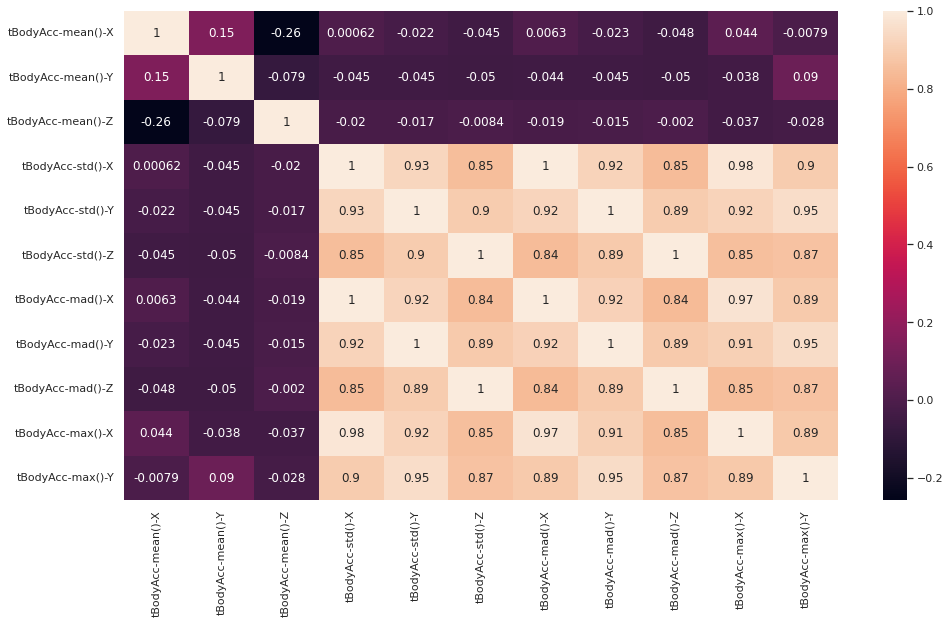

In [219]:
sns.set(rc = {"figure.figsize":(16, 9)})
sns.heatmap(correlation_feat1,annot = True)


*As suspected, high correlation was observed between the 4th feature and next features. We plot correlation heatmaps between the remaining features in the entire data to see the general trend in dataset.*

<AxesSubplot:>

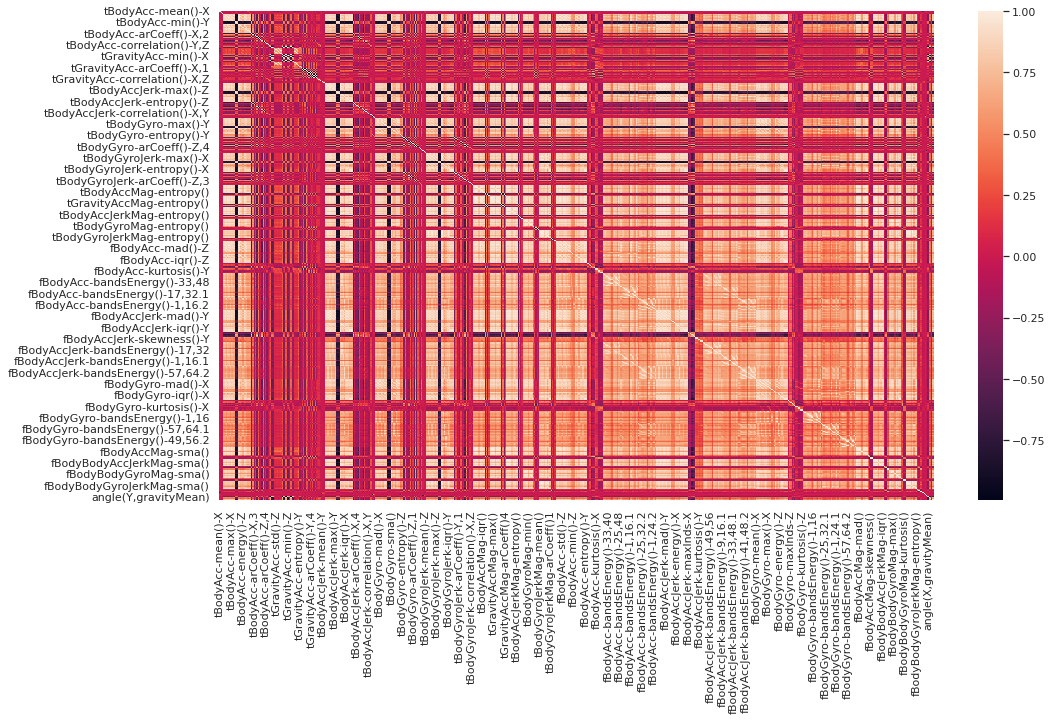

In [220]:
sns.set(rc = {"figure.figsize":(16, 9)})
sns.heatmap(data.iloc[:,:].corr())

**We can clearly see a pattern emerging from all the features present in the dataset hence it is possible to drop certain features to make the data a better fit for the model**

## Removing non-Important Features

*We have a look at the data once again to see if it may be possible to drop any columns before we proceed with modeling*

In [221]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,2
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,2
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,2
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,2
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,2


*Since data is already normalized, the factor that which subject it was obtained from seems insignificant hence we drop the feature*

In [222]:
data = data.drop(['subject'], axis = 1)

In [223]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,2
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,2
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,2
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,2
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,2


## Splitting Predictor and Target Varaibles

In [224]:
X,y = data.iloc[:,:-1],data.iloc[:,-1]

Applying PCA on the given data (X)

In [225]:
pca = PCA(n_components = 0.97)
X_red = pca.fit_transform(X)

In [226]:
X.shape

(7352, 561)

In [227]:
X_red.shape

(7352, 95)

One can observe that using PCA we reduced the we reduced the features in such a way that would explain the variance in the dataset as clearly there existed a pattern in the data as observed from the correlation heat map.

In [228]:
c = pca.explained_variance_ratio_
sum(c)

0.9703645878282806

In [229]:
X_red

array([[-5.52028030e+00, -2.90277517e-01, -1.52992855e+00, ...,
        -3.87122184e-01,  8.32546777e-03,  4.28389233e-02],
       [-5.53534954e+00, -8.25302495e-02, -1.92480428e+00, ...,
        -6.30495281e-02,  2.12678073e-02,  1.72028368e-02],
       [-5.47498801e+00,  2.87387051e-01, -2.14464160e+00, ...,
        -1.45007463e-01,  8.70656257e-02,  1.58396049e-01],
       ...,
       [ 5.85750527e+00, -3.08184349e+00,  6.71207302e-01, ...,
        -1.96411109e-01, -7.49389564e-02,  1.83982989e-01],
       [ 5.42109482e+00, -3.42643018e+00,  6.71243268e-01, ...,
        -5.35624845e-03, -9.14410233e-02,  6.97821702e-02],
       [ 5.49797027e+00, -2.78992873e+00,  5.72224007e-03, ...,
         1.51423187e-01, -1.45941083e-01,  1.18562065e-01]])

## Standardizing the Variables

In [230]:
X_red = (X_red - np.mean(X_red))/ np.std(X_red)
X_red

array([[-7.32111196e+00, -3.84972155e-01, -2.02902346e+00, ...,
        -5.13409592e-01,  1.10414107e-02,  5.68138820e-02],
       [-7.34109711e+00, -1.09453355e-01, -2.55271596e+00, ...,
        -8.36176117e-02,  2.82058138e-02,  2.28147644e-02],
       [-7.26104438e+00,  3.81138758e-01, -2.84426885e+00, ...,
        -1.92311951e-01,  1.15468266e-01,  2.10068175e-01],
       ...,
       [ 7.76834682e+00, -4.08720573e+00,  8.90169257e-01, ...,
        -2.60484548e-01, -9.93856219e-02,  2.44002114e-01],
       [ 7.18957009e+00, -4.54420385e+00,  8.90216955e-01, ...,
        -7.10356947e-03, -1.21271010e-01,  9.25465835e-02],
       [ 7.29152393e+00, -3.70006223e+00,  7.58895527e-03, ...,
         2.00820619e-01, -1.93550137e-01,  1.57239507e-01]])

## Spliting Training and Testing Data Set

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X_red,y,test_size = 0.3, random_state = 21)

# Training the Model using different variations of NB

The 3 NB Models we use for the dataset to check performance are
* GaussianNB
* BernoulliNB
* MultinomialNB

In [232]:
#Lists to store model time and accuracy for different NB models
nb_model_time = []
nb_model_acc = []

*We first use the GaussianNB classifier to check the results*

In [233]:
start = time.time()
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
y_pred_gaussianNB = nb_model.predict(X_test)
run_time = time.time()-start

nb_model_time.append(run_time)
nb_model_acc.append(accuracy_score(y_test,y_pred_gaussianNB))
print(run_time,'seconds')

0.013845443725585938 seconds


In [234]:
print(classification_report(y_test,y_pred_gaussianNB))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       431
           1       0.91      0.77      0.83       382
           2       0.85      0.92      0.88       414
           3       0.94      0.93      0.93       361
           4       0.85      0.87      0.86       290
           5       0.91      0.93      0.92       328

    accuracy                           0.90      2206
   macro avg       0.90      0.90      0.90      2206
weighted avg       0.91      0.90      0.90      2206



In [235]:
start = time.time()
nb_model = BernoulliNB()
nb_model.fit(X_train,y_train)
y_pred_bernoulliNB = nb_model.predict(X_test)
run_time = time.time()-start

nb_model_time.append(run_time)
nb_model_acc.append(accuracy_score(y_test,y_pred_bernoulliNB))
print(run_time,'seconds')

0.02651810646057129 seconds


In [236]:
print(classification_report(y_test,y_pred_bernoulliNB))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       431
           1       0.82      0.74      0.77       382
           2       0.82      0.87      0.84       414
           3       0.91      0.90      0.90       361
           4       0.86      0.89      0.88       290
           5       0.91      0.90      0.90       328

    accuracy                           0.88      2206
   macro avg       0.88      0.88      0.88      2206
weighted avg       0.88      0.88      0.88      2206



*Since multinomial NB does not take negative values and our data is already normalized, we use MinMaxScaler to scale our data from 0 to 1 and fit the multinomialNB model on it*

In [237]:
X_train_copy = X_train
X_test_copy = X_test
scaler = MinMaxScaler()
X_train_copy = scaler.fit_transform(X_train_copy)
X_test_copy = scaler.fit_transform(X_test_copy)

start = time.time()
nb_model = MultinomialNB()
nb_model.fit(X_train_copy,y_train)
y_pred_multinomialNB = nb_model.predict(X_test_copy)
run_time = time.time()-start

nb_model_time.append(run_time)
nb_model_acc.append(accuracy_score(y_test,y_pred_multinomialNB))
print(run_time,'seconds')

0.007507801055908203 seconds


In [238]:
print(classification_report(y_test, y_pred_multinomialNB))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       431
           1       0.99      0.49      0.66       382
           2       0.71      1.00      0.83       414
           3       0.61      1.00      0.76       361
           4       1.00      0.42      0.59       290
           5       0.96      0.78      0.86       328

    accuracy                           0.80      2206
   macro avg       0.87      0.78      0.78      2206
weighted avg       0.86      0.80      0.79      2206



**Looking at the accuracy scores, we can state that Gaussian NB performs better asa it assumes the data to be normally distributed whereas Multinomial works better with discrete data, which is not the case with our data, and Bernoulli works better with boolean data. Hence Gaussian is found to be better**

In [239]:
from sklearn import metrics
def cf_display_func(y_test,y_pred):
    cm = metrics.confusion_matrix(y_test, y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS','WALKING_UPSTAIRS'])
    fig, axis = plt.subplots(figsize =(17,17))
    axis.grid(False)
    cm_display.plot(ax = axis)
    
#to display the confusion matrix for any model

*Here we have defined a function to display confusion matrix obtained in different models so that it can easily be displayed when required.*

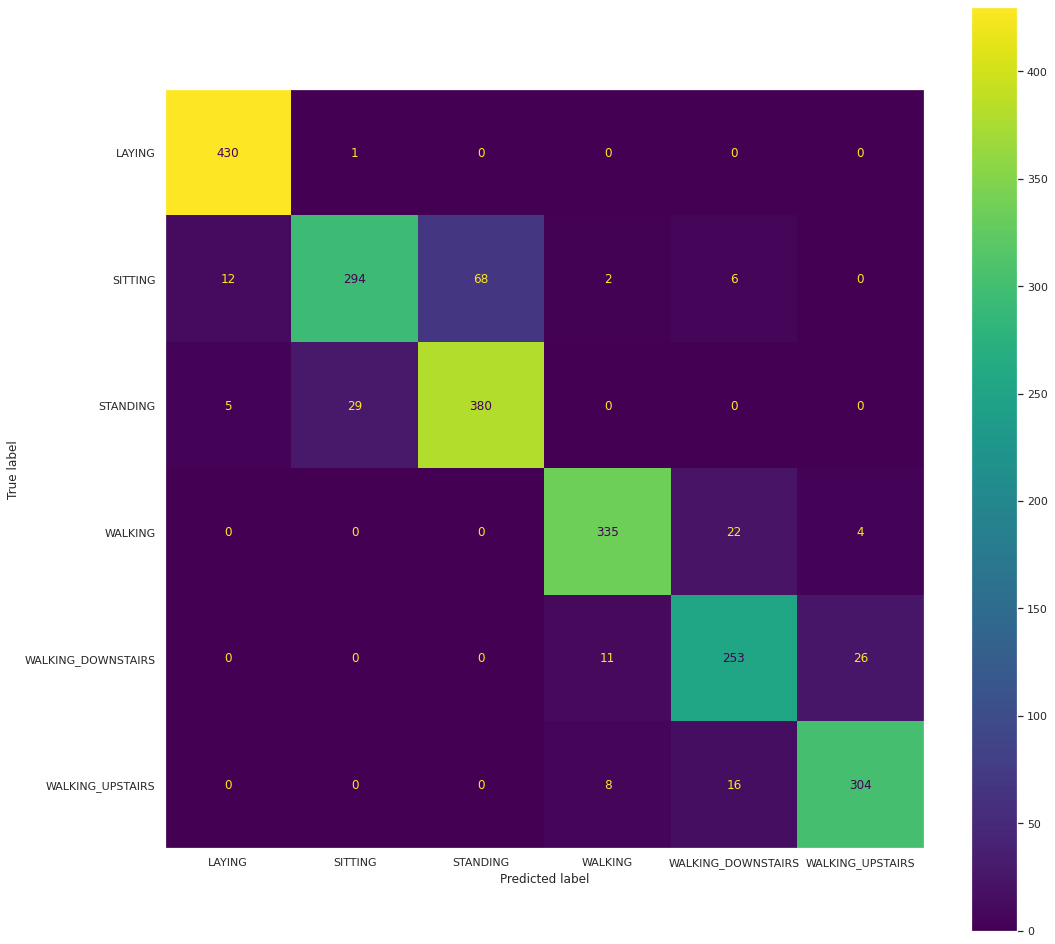

In [240]:
cf_display_func(y_test,y_pred_gaussianNB)


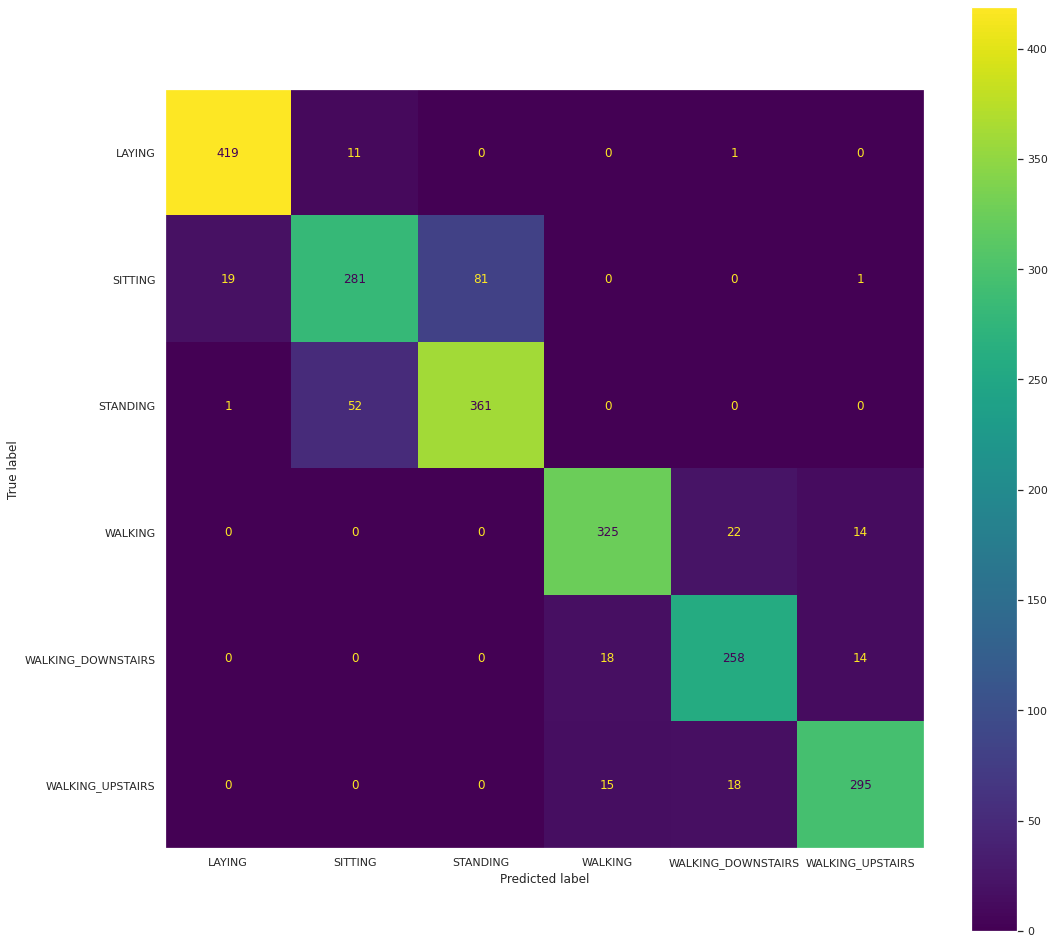

In [241]:
cf_display_func(y_test,y_pred_bernoulliNB)


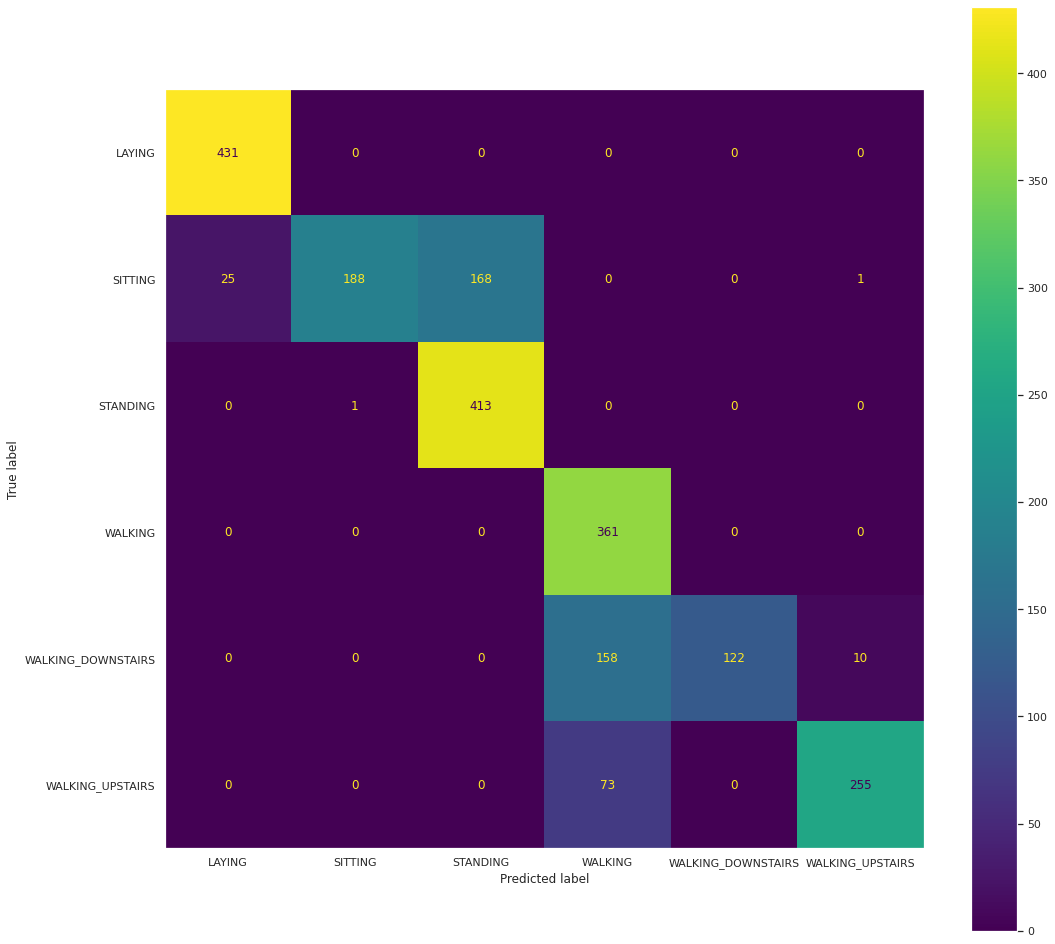

In [242]:
cf_display_func(y_test, y_pred_multinomialNB)

# Comparing the time and accuracy of different NB algos 

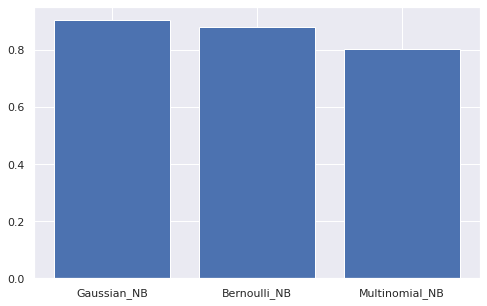

In [243]:
plt.figure(figsize=(8,5))
plt.bar(x = ['Gaussian_NB','Bernoulli_NB','Multinomial_NB'], height = nb_model_acc)
plt.show()

**As clear from the observation that among the NB models, Gaussian_NB algorithm gives the best accuracy of 88%**

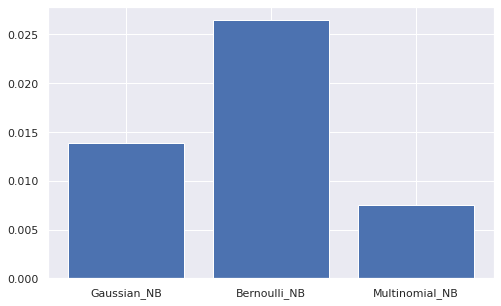

In [244]:
plt.figure(figsize=(8,5))
plt.bar(x = ['Gaussian_NB','Bernoulli_NB','Multinomial_NB'], height = nb_model_time)
plt.show()

**Since time taken by all three models is less than a second, however the maximum accuracy is achieved from Gaussian_NB algorithm, we shall select Gaussian_NB as the best NB algorithm for the data before we move on to Logistic Regression for further analysis**

# Train Model with Logistic Regression with different solver and penalty 

In [245]:
#Lists to store model time and accuracy
lg_model_acc = []
lg_model_time = []

In [246]:
#l2 penalty using lbfgs solver
start = time.time()
lg_model = LogisticRegression(penalty = 'l2', solver = 'lbfgs',max_iter = 1000)
lg_model.fit(X_train,y_train)
y_pred_l2_lbfgs = lg_model.predict(X_test)
run_time = time.time()-start

lg_model_time.append(run_time)
lg_model_acc.append(accuracy_score(y_test,y_pred_l2_lbfgs))
print(run_time,'seconds')

4.398756980895996 seconds


*Logistic Regression is performed by using l2 penalty and lbfgs solver*

In [247]:
print(classification_report(y_test,y_pred_l2_lbfgs))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       431
           1       0.98      0.95      0.96       382
           2       0.96      0.98      0.97       414
           3       0.99      1.00      0.99       361
           4       1.00      0.99      1.00       290
           5       1.00      0.99      0.99       328

    accuracy                           0.99      2206
   macro avg       0.99      0.99      0.99      2206
weighted avg       0.99      0.99      0.99      2206



In [248]:
start = time.time()
lg_model = LogisticRegression(penalty = 'l2', solver = 'newton-cg',max_iter = 1000)
lg_model.fit(X_train,y_train)
y_pred_l2_newtoncg = lg_model.predict(X_test)
run_time = time.time()-start

lg_model_time.append(run_time)
lg_model_acc.append(accuracy_score(y_test,y_pred_l2_newtoncg))
print(run_time,'seconds')

2.0386295318603516 seconds


In [249]:
print(classification_report(y_test,y_pred_l2_newtoncg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       431
           1       0.98      0.95      0.96       382
           2       0.96      0.98      0.97       414
           3       0.99      1.00      0.99       361
           4       1.00      0.99      1.00       290
           5       1.00      0.99      0.99       328

    accuracy                           0.99      2206
   macro avg       0.99      0.99      0.99      2206
weighted avg       0.99      0.99      0.99      2206



In [250]:
start = time.time()
lg_model = LogisticRegression(penalty = 'l2', solver = 'sag',max_iter = 1000)
lg_model.fit(X_train,y_train)
y_pred_l2_sag = lg_model.predict(X_test)
run_time = time.time()-start

lg_model_time.append(run_time)
lg_model_acc.append(accuracy_score(y_test,y_pred_l2_sag))
print(run_time,'seconds')

8.261925458908081 seconds


In [251]:
print(classification_report(y_test,y_pred_l2_sag))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       431
           1       0.98      0.95      0.96       382
           2       0.96      0.98      0.97       414
           3       0.99      1.00      0.99       361
           4       1.00      0.99      1.00       290
           5       1.00      0.99      0.99       328

    accuracy                           0.98      2206
   macro avg       0.99      0.98      0.99      2206
weighted avg       0.98      0.98      0.98      2206



In [252]:
start = time.time()
lg_model = LogisticRegression(penalty = 'l2', solver = 'saga',max_iter = 1000)
lg_model.fit(X_train,y_train)
y_pred_l2_saga = lg_model.predict(X_test)
run_time = time.time()-start

lg_model_time.append(run_time)
lg_model_acc.append(accuracy_score(y_test,y_pred_l2_saga))
print(run_time,'seconds')

15.075496196746826 seconds


In [253]:
print(classification_report(y_test,y_pred_l2_saga))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       431
           1       0.97      0.95      0.96       382
           2       0.96      0.98      0.97       414
           3       0.99      1.00      0.99       361
           4       1.00      0.99      1.00       290
           5       1.00      0.99      0.99       328

    accuracy                           0.98      2206
   macro avg       0.99      0.98      0.98      2206
weighted avg       0.98      0.98      0.98      2206



*Since the model with no penalty fails to converge increase number of max iterations and perform the same*

In [254]:
start = time.time()
lg_model = LogisticRegression(penalty = 'none', solver = 'lbfgs',max_iter = 10000)
lg_model.fit(X_train,y_train)
y_pred_none_lbfgs = lg_model.predict(X_test)
run_time = time.time()-start

lg_model_time.append(run_time)
lg_model_acc.append(accuracy_score(y_test,y_pred_none_lbfgs))
print(run_time,'seconds')

15.22128963470459 seconds


In [255]:
print(classification_report(y_test,y_pred_none_lbfgs))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       431
           1       0.97      0.94      0.95       382
           2       0.95      0.97      0.96       414
           3       0.99      1.00      0.99       361
           4       0.99      0.99      0.99       290
           5       0.99      0.99      0.99       328

    accuracy                           0.98      2206
   macro avg       0.98      0.98      0.98      2206
weighted avg       0.98      0.98      0.98      2206



In [256]:
start = time.time()
lg_model = LogisticRegression(penalty = 'elasticnet', solver = 'saga',max_iter = 1000, l1_ratio = 0.5)
lg_model.fit(X_train,y_train)
y_pred_elasticnet_saga = lg_model.predict(X_test)
run_time = time.time()-start

lg_model_time.append(run_time)
lg_model_acc.append(accuracy_score(y_test,y_pred_elasticnet_saga))
print(run_time,'seconds')


27.351163625717163 seconds


In [257]:
print(classification_report(y_test,y_pred_elasticnet_saga))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       431
           1       0.97      0.95      0.96       382
           2       0.96      0.98      0.97       414
           3       0.99      1.00      0.99       361
           4       1.00      0.99      1.00       290
           5       1.00      0.99      0.99       328

    accuracy                           0.98      2206
   macro avg       0.99      0.98      0.98      2206
weighted avg       0.98      0.98      0.98      2206



In [258]:
start = time.time()
lg_model = LogisticRegression(penalty = 'l1', solver = 'liblinear', max_iter = 1000)
lg_model.fit(X_train, y_train)
y_pred_l1_liblinear = lg_model.predict(X_test)
run_time = time.time()-start

lg_model_time.append(run_time)
lg_model_acc.append(accuracy_score(y_test,y_pred_l1_liblinear))
print(run_time,'seconds')

8.915673732757568 seconds


In [259]:
print(classification_report(y_test,y_pred_l1_liblinear))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       431
           1       0.98      0.95      0.97       382
           2       0.96      0.98      0.97       414
           3       0.98      1.00      0.99       361
           4       1.00      0.99      0.99       290
           5       1.00      0.99      1.00       328

    accuracy                           0.99      2206
   macro avg       0.99      0.99      0.99      2206
weighted avg       0.99      0.99      0.99      2206



**All the logistic regression models performed fairly well with about 98-99% accuracy while using different combinations of solver and penalty**

# Comparing time and accuracy of different Logistic Regression algos

*Since the accuracy scores from different models have been obtained, we can simply plot the bar plot for time and accuracy to see which model should be selected for the data*

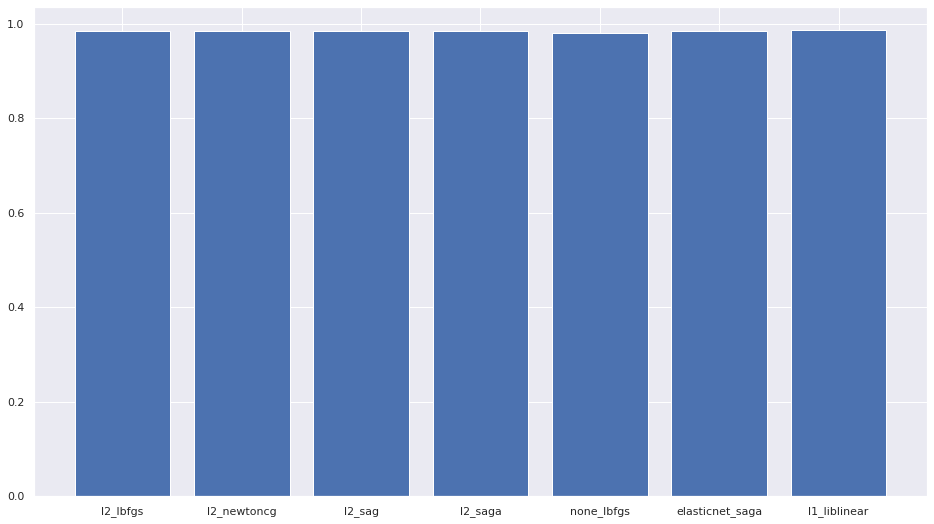

In [266]:
plt.figure(figsize = (16,9))
plt.bar(x = ['l2_lbfgs','l2_newtoncg','l2_sag','l2_saga','none_lbfgs','elasticnet_saga','l1_liblinear'],height = lg_model_acc)
plt.show()

**All the logistic regression models gave pretty similar accuracy (about 99%) on the data set and the precision recall scores were higher as well**`

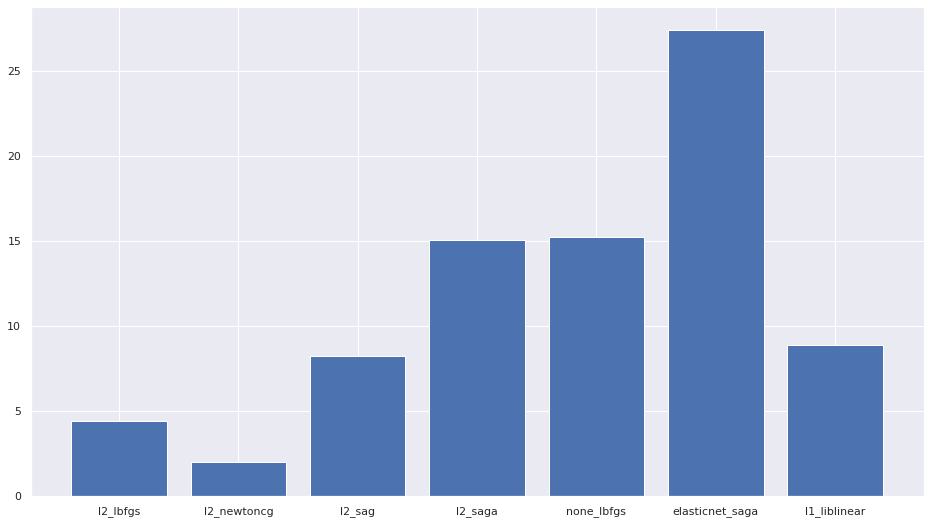

In [265]:
plt.figure(figsize=(16,9))
plt.bar(x = ['l2_lbfgs','l2_newtoncg','l2_sag','l2_saga','none_lbfgs','elasticnet_saga','l1_liblinear'],height = lg_model_time)
plt.show()

**As logistic regression with l2 penalty and newton-cg solver fits the data in the least time, we select the same as our final model**

# Plotting confusion Matrix for the final model selected

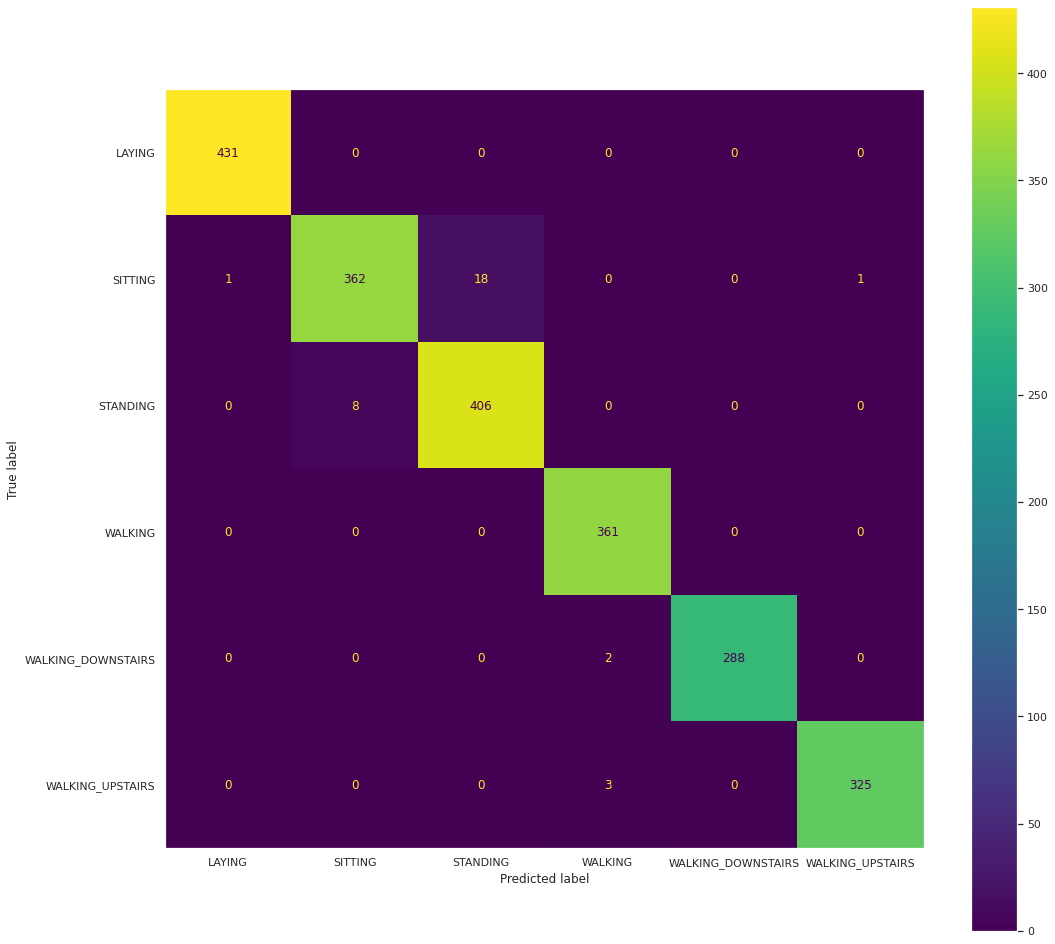

In [262]:
cf_display_func(y_test, y_pred_l2_newtoncg)